In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def LSfit(xdata, ydata):
    adjy=[]
    for n in ydata:
        p = n/1000000
        adjy.append(p)
    Sx: float
    Sx = 0
    for n in xdata:
        Sx += n
    Sy: float
    Sy = 0
    for n in adjy:
        Sy += n
    Sxy: float
    Sxy = 0
    xy = xdata*adjy
    for n in xy:
        Sxy += n
    Sxx: float
    Sxx = 0
    for n in xdata:
        Sxx += n**2
    N = len(xdata)
    m = ((Sx*Sy)-(N*Sxy))/((Sx**2)-(N*Sxx))
    c = (Sy-(m*Sx))/(N)
    return m, c

In [3]:
def LSresid(xdata, ydata, m, c):
    adjy=[]
    for n in ydata:
        p = n/1000000
        adjy.append(p)
    yfit = m*xdata + c
    err = adjy - yfit
    arr = np.array([xdata, adjy, yfit, err])
    return arr

In [4]:
def LSprint():
    m, c = LSfit(xdata, ydata)
    myArray = LSresid(xdata, ydata, grad, inter)
    print(m)

In [5]:
def LSplot(xdata, ydata, m, c):
    adjy=[]
    for n in ydata:
        p = n/1000000
        adjy.append(p)
    fig1 = plt.figure()
    ax1 = fig1.gca()
    ax1.plot(xdata, adjy, 'r^', label="Population")
    fit = xdata*m + c
    ax1.plot(xdata, fit, 'g-', label="Fit Line")
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Population[Bn]")
    plt.savefig("PopulationPlot.png", dpi=300)
    plt.show()
    
    yfit = m*xdata + c
    err = adjy - yfit
    
    fig2 = plt.figure()
    ax2 = fig2.gca()
    ax2.errorbar(xdata, yfit, yerr = err, ecolor="k", lw=0, elinewidth=1)
    plt.savefig("ResidualPlot.png", dpi=300)
    plt.show()

0.07725242365221856


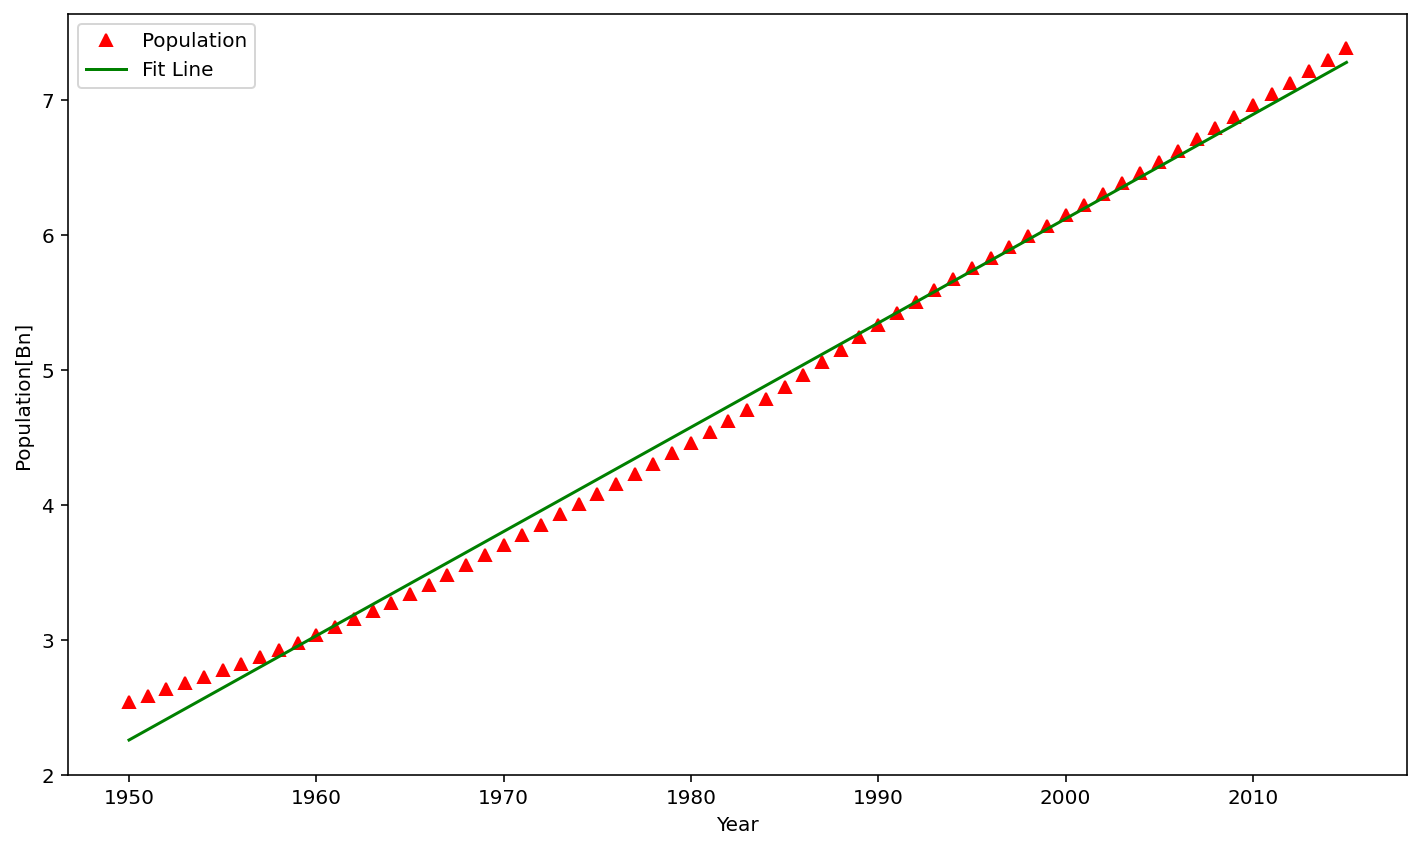

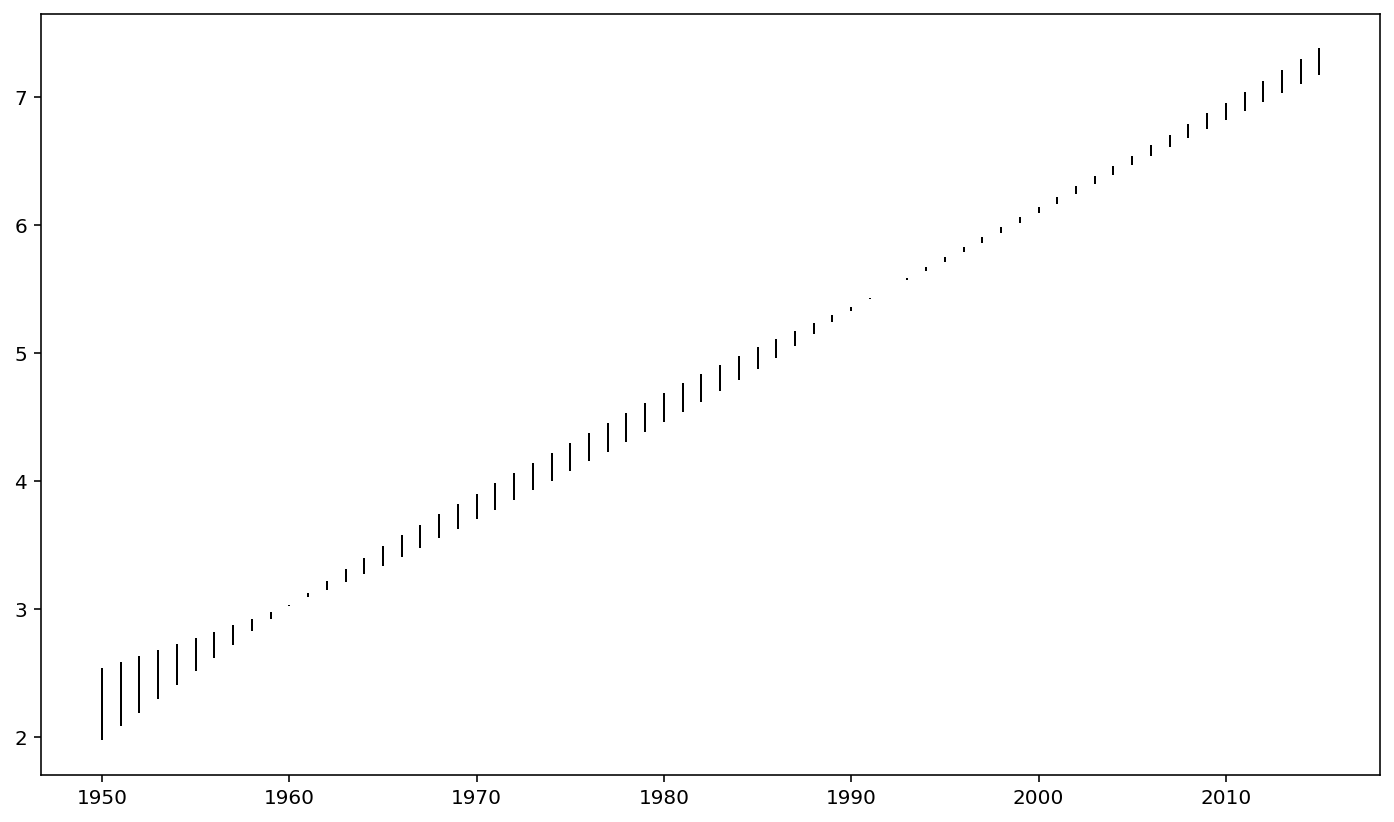

In [6]:
xdata, ydata = np.genfromtxt("PopulationData.csv", unpack=True, delimiter=',', skip_header=1)
grad, inter = LSfit(xdata, ydata)
LSresid(xdata, ydata, grad, inter)
LSprint()
LSplot(xdata, ydata, grad, inter)